In [1]:
import pandas as pd
df = pd.read_csv("../3_Analysis_on_Extracted_Data/tracking_features_with_labels.csv")
df.head()

,tracking_id,num_points,bbox_area,point_density,avg_segment_distance,num_stops,duration,length,cluster,pca1,pca2,predicted_label
0,7,1893,0.020102,94163.475771,62.014453,1893,299460000000,118.952195,0,1.609326,0.884110,RURAL
1,8,1752,0.004143,422811.577870,41.602138,1752,346740000000,75.038270,1,1.917505,-1.713543,SUBURBAN
2,11,1224,0.059016,20739.850042,69.604793,1224,208300000000,86.281243,2,-1.735498,1.807416,TOWN
3,12,2091,0.019318,108238.062218,66.382378,2091,355540000000,140.722367,1,2.853082,1.272948,SUBURBAN
4,15,1587,0.087849,18064.875589,80.415227,1587,340810000000,128.919145,0,0.711379,3.529854,RURAL


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.tree import DecisionTreeClassifier
features = df.drop(columns=["tracking_id", "cluster", "predicted_label", "pca1", "pca2"])
labels = df["predicted_label"]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       RURAL       0.98      0.98      0.98      1729
    SUBURBAN       0.98      0.98      0.98      1418
        TOWN       0.97      0.98      0.98      1899
       URBAN       0.99      0.99      0.99      3989

    accuracy                           0.98      9035
   macro avg       0.98      0.98      0.98      9035
weighted avg       0.98      0.98      0.98      9035

Confusion Matrix:
[[1696   12   14    7]
 [  15 1396    0    7]
 [  14    0 1857   28]
 [  10   11   37 3931]]


In [3]:
import joblib
joblib.dump(clf, "rf_area_classifier_full.pkl")


['rf_area_classifier_full.pkl']

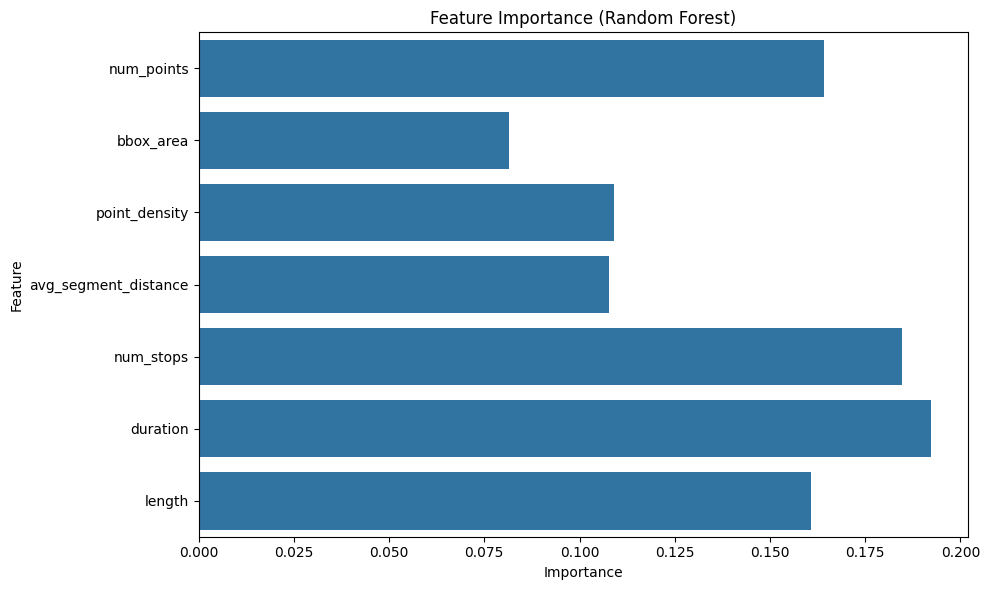

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

clf = joblib.load("rf_area_classifier_full.pkl")

importances = clf.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [5]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(clf, features, labels, cv=skf, scoring="accuracy")

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Std Dev:", np.std(scores))


Cross-Validation Scores: [0.98273572 0.9831784  0.98185038 0.98029666 0.98162497 0.98251052
 0.98029666 0.98383883 0.98073943 0.98361745]
Mean Accuracy: 0.9820689004981722
Std Dev: 0.0012528096230043622
